### subset the env variables to read temperature and check if there is enough data there


In [1]:
#imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from urllib.request import urlopen
from bs4 import BeautifulSoup
from sys import platform
import io
import datetime

if platform == "linux" or platform == "linux2":
    data_string = "/home/maria/Documents/data/pied_piper/puyallup/"
    output_string = "/home/maria/Documents/output/pied_piper/puyallup/"

elif platform == "win32"or platform == "win64":
    data_string = "C:/Users/maria/OneDrive/Documents/data/pied_piper/puyallup/"
    output_string = "C:/Users/maria/OneDrive/Documents/output/pied_piper/puyallup/"

In [2]:
# #read file in Windows
try:
    df = pd.read_csv(data_string + "env_variables.csv",
    header = [0]
)
except PermissionError:
    print("Permission Error. Close the file, if it is open.")
    

df.head()


C:\Users\maria\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (24,65) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Study_ID,Study_Name,Location_ID,Study_Specific_Location_ID,Location_Name,Field_Collection_Type,Field_Collector,Field_Collection_Start_Date,Field_Collection_Start_Time,Field_Collection_Start_Date_Time,...,Result_Taxon_Life_Stage,Study_ID_Alias,Study_QA_Planning_Level,Study_QA_Assessment_Level,Study_Type,EIM_Data_Entry_Review_Status,Calculated_Latitude_Decimal_Degrees_NAD83HARN,Calculated_Longitude_Decimal_Degrees_NAD83HARN,Record_Created_On,Result_System_ID
0,AMS001B,Statewide River and Stream Ambient Monitoring-...,10A070,10A070,PUYALLUP RIVER AT MERIDIAN ST,Measurement,NaN,01/05/1978,12:25:00,01/05/1978 12:25:00,...,NaN,NaN,LEVEL 1: Informal or no QA documentation.,Level 1: Data neither Verified nor Assessed f...,Routine ambient monitoring,Reviewed,47.2026,-122.29373,NaN,4293592
1,AMS001B,Statewide River and Stream Ambient Monitoring-...,10A070,10A070,PUYALLUP RIVER AT MERIDIAN ST,Measurement,NaN,01/05/1978,12:25:00,01/05/1978 12:25:00,...,NaN,NaN,LEVEL 1: Informal or no QA documentation.,Level 1: Data neither Verified nor Assessed f...,Routine ambient monitoring,Reviewed,47.2026,-122.29373,NaN,5293592
2,AMS001B,Statewide River and Stream Ambient Monitoring-...,10A070,10A070,PUYALLUP RIVER AT MERIDIAN ST,Measurement,NaN,01/05/1978,12:25:00,01/05/1978 12:25:00,...,NaN,NaN,LEVEL 1: Informal or no QA documentation.,Level 1: Data neither Verified nor Assessed f...,Routine ambient monitoring,Reviewed,47.2026,-122.29373,NaN,6191492
3,AMS001B,Statewide River and Stream Ambient Monitoring-...,10A070,10A070,PUYALLUP RIVER AT MERIDIAN ST,Measurement,NaN,01/05/1978,12:25:00,01/05/1978 12:25:00,...,NaN,NaN,LEVEL 1: Informal or no QA documentation.,Level 1: Data neither Verified nor Assessed f...,Routine ambient monitoring,Reviewed,47.2026,-122.29373,NaN,8313392
4,AMS001C,Statewide River and Stream Ambient Monitoring-...,10A070,10A070,PUYALLUP RIVER AT MERIDIAN ST,Measurement,NaN,01/05/1984,11:30:00,01/05/1984 11:30:00,...,NaN,NaN,LEVEL 1: Informal or no QA documentation.,Level 1: Data neither Verified nor Assessed f...,Routine ambient monitoring,Reviewed,47.2026,-122.29373,NaN,1574360


In [3]:
list(df)
df_subset = df[['Result_Value','Field_Collection_Start_Date']][df['Result_Parameter_Name']=='Temperature, water']
df_subset['date'] = pd.to_datetime(df_subset['Field_Collection_Start_Date'])
df_subset = df_subset.sort_values(by='date',ascending=False)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_subset)

,Result_Value,Field_Collection_Start_Date,date
2488,7.46,04/10/2023,2023-04-10
2385,5.96,03/13/2023,2023-03-13
2267,5.76,02/06/2023,2023-02-06
2167,5.23,01/09/2023,2023-01-09
3367,5.37,12/12/2022,2022-12-12
3228,9.60,10/31/2022,2022-10-31
3146,11.40,10/17/2022,2022-10-17
3024,13.80,09/12/2022,2022-09-12
2917,16.80,08/08/2022,2022-08-08
2921,16.80,08/08/2022,2022-08-08


In [21]:
df_subset_flow = df[['Result_Value','Field_Collection_Start_Date']][df['Result_Parameter_Name']=='Flow']
df_subset_flow['date'] = pd.to_datetime(df_subset_flow['Field_Collection_Start_Date'])
df_subset_flow = df_subset_flow.sort_values(by='date',ascending=False)

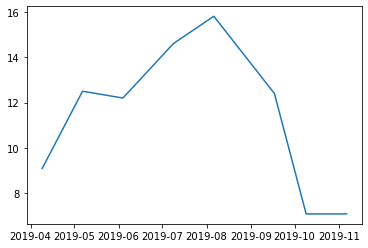

In [19]:
plt.plot(df_subset['date'][df_subset['date']<'2019-11-10 00:00:00'][df_subset['date'] > '2019-03-10 00:00:00'], 
         df_subset['Result_Value'][df_subset['date']<'2019-11-10 00:00:00'][df_subset['date'] > '2019-03-10 00:00:00'])

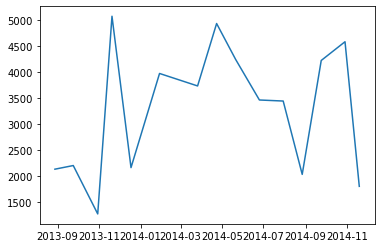

In [30]:
plt.plot(df_subset_flow['date'][df_subset_flow['date']<'2014-12-10 00:00:00'][df_subset_flow['date'] > '2013-08-10 00:00:00'], 
         df_subset_flow['Result_Value'][df_subset_flow['date']<'2014-12-10 00:00:00'][df_subset_flow['date'] > '2013-08-10 00:00:00'])